# Task
Analyze the "Mall Customers Dataset" to segment customers using K-Means clustering. Perform EDA, determine the optimal number of clusters, apply K-Means, visualize the clusters using PCA or t-SNE, and suggest tailored marketing strategies for each segment.

## Load the dataset

### Subtask:
Load the Mall Customers Dataset from the provided path into a pandas DataFrame.


**Reasoning**:
Import pandas, load the dataset, and display the first 5 rows as instructed.



In [1]:
import pandas as pd

df = pd.read_csv("/content/Mall_Customers.csv")
display(df.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploratory data analysis (eda)

### Subtask:
Perform EDA to understand the data distribution, identify potential issues, and gain insights into customer spending habits. This will include visualizing the data and calculating descriptive statistics.


**Reasoning**:
Display descriptive statistics and information about the DataFrame to understand the data distribution and identify potential issues.



In [2]:
display(df.describe())
display(df.info())

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


None

**Reasoning**:
Create histograms for 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)' to visualize their distributions.



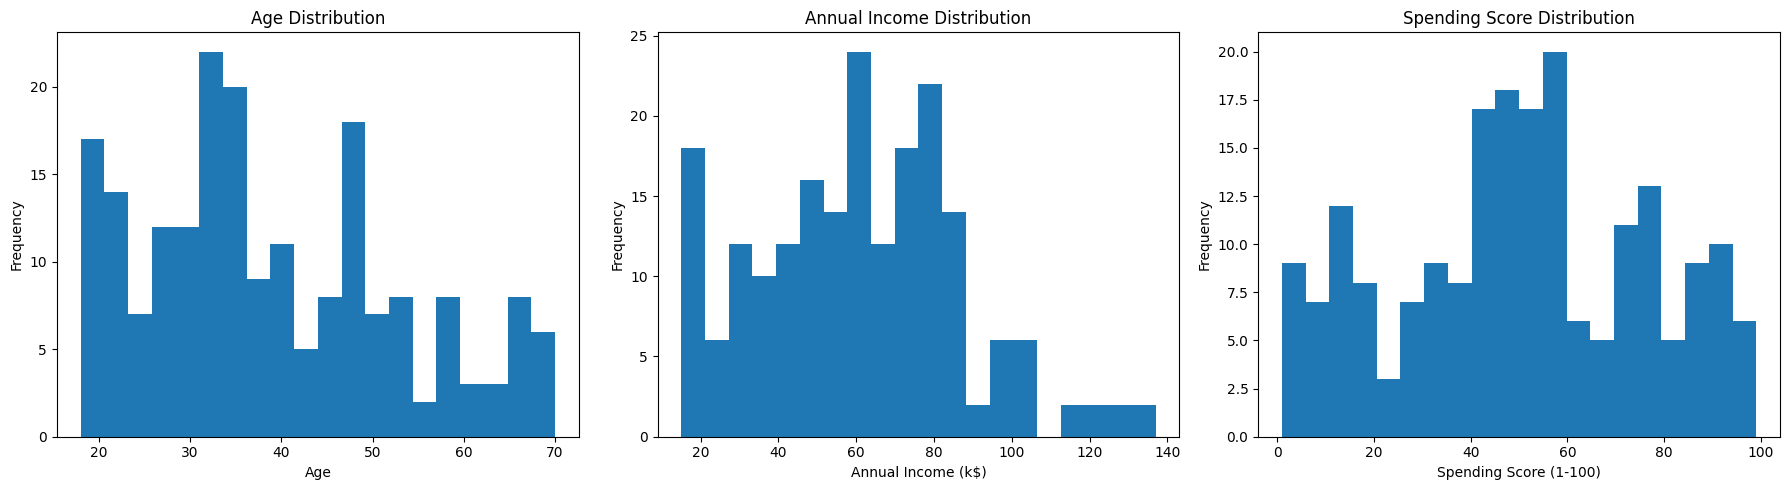

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.hist(df['Age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['Annual Income (k$)'], bins=20)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['Spending Score (1-100)'], bins=20)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Reasoning**:
Create a count plot for 'Gender' and scatter plots for 'Annual Income (k$)' vs 'Spending Score (1-100)' and 'Age' vs 'Spending Score (1-100)' to visualize gender distribution and relationships between spending score and other features.



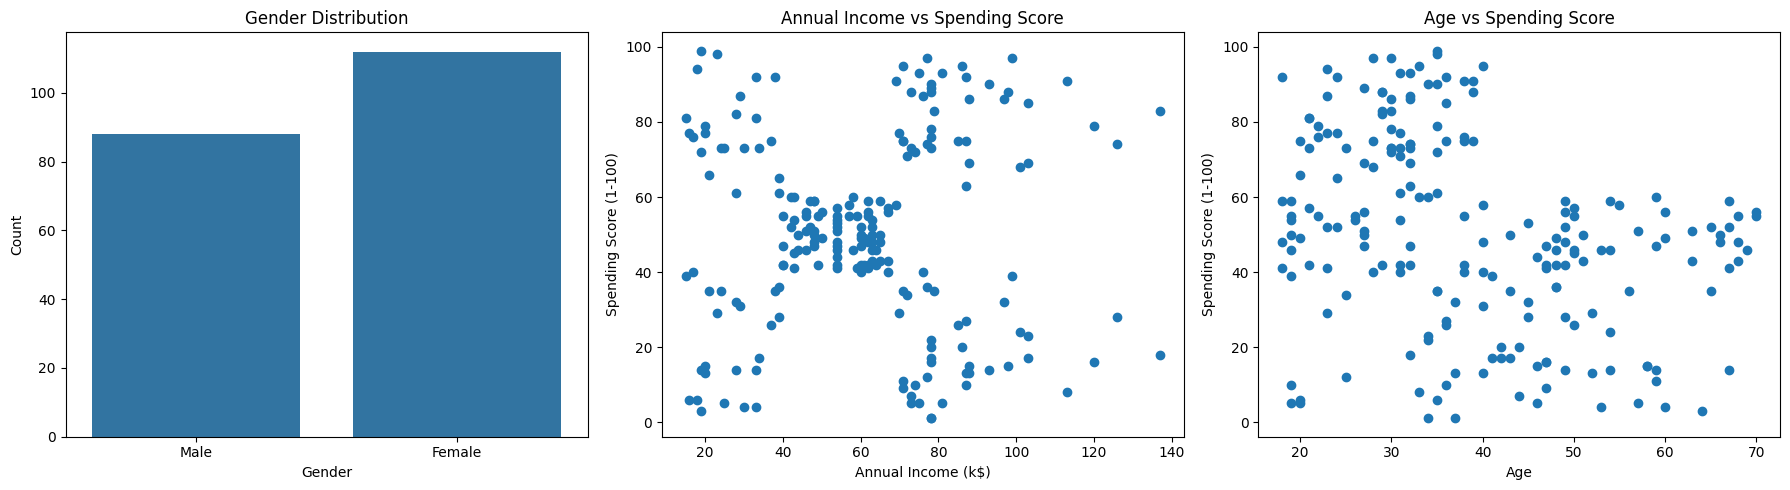

In [4]:
import seaborn as sns

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.subplot(1, 3, 3)
plt.scatter(df['Age'], df['Spending Score (1-100)'])
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

## Data preprocessing

### Subtask:
Prepare the data for K-Means clustering by handling missing values (if any), scaling the features, and selecting the relevant columns for clustering.


**Reasoning**:
Select the relevant columns for clustering, scale the selected data using StandardScaler, and store the scaled data in a new variable.



In [5]:
from sklearn.preprocessing import StandardScaler

# Select the relevant columns
data_for_clustering = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Instantiate the scaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data_for_clustering)

display(scaled_data[:5])

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

## Determine the optimal number of clusters

### Subtask:
Use methods like the elbow method or silhouette score to find the optimal number of clusters for K-Means.


**Reasoning**:
Calculate the inertia for a range of cluster numbers and plot the elbow curve.



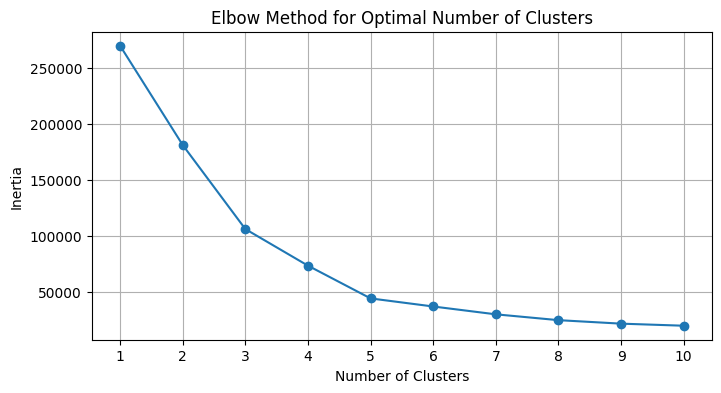

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(data_for_clustering)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

**Reasoning**:
Calculate and plot the silhouette scores for a range of cluster numbers to further evaluate the optimal number of clusters.



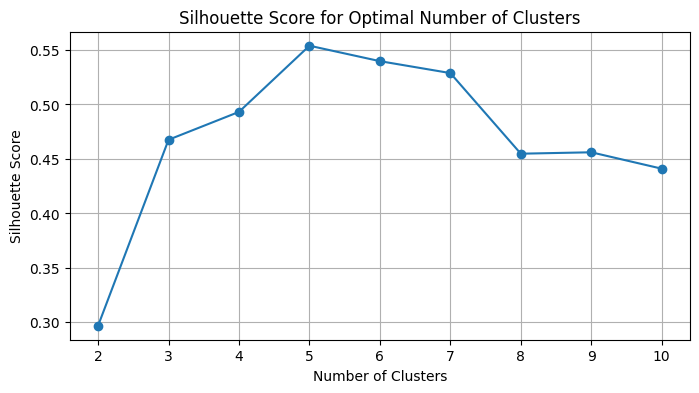

In [7]:
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(data_for_clustering)
    score = silhouette_score(data_for_clustering, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(2, 11, 1))
plt.grid(True)
plt.show()

## Apply k-means clustering

### Subtask:
Apply K-Means clustering with the determined number of clusters to segment the customers.


**Reasoning**:
Apply K-Means clustering with 5 clusters to the scaled data and add the cluster labels to the original DataFrame.



In [8]:
from sklearn.cluster import KMeans

# Instantiate and fit the KMeans model
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(scaled_data)

# Get cluster labels and add to original DataFrame
df['Cluster'] = kmeans.labels_

# Display the head of the updated DataFrame
display(df.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


## Dimensionality reduction

### Subtask:
Use PCA or t-SNE to reduce the dimensionality of the data for visualization purposes while preserving the cluster structure.


**Reasoning**:
Import PCA and perform dimensionality reduction.



In [9]:
from sklearn.decomposition import PCA

# Instantiate PCA
pca = PCA(n_components=2)

# Fit and transform the scaled data
pca_data = pca.fit_transform(scaled_data)

# Create a new DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = df['Cluster']

display(pca_df.head())

,PCA1,PCA2,Cluster
0,-1.537109,-0.922207,4
1,-0.384168,-2.075149,2
2,-2.416002,0.010665,4
3,-0.466982,-1.938355,2
4,-1.455678,-0.895678,4


## Visualize the clusters

### Subtask:
Visualize the clusters in a 2D or 3D plot using the reduced dimensions to understand the segmentation.


**Reasoning**:
Create a scatter plot of the PCA components, colored by cluster, to visualize the customer segments.



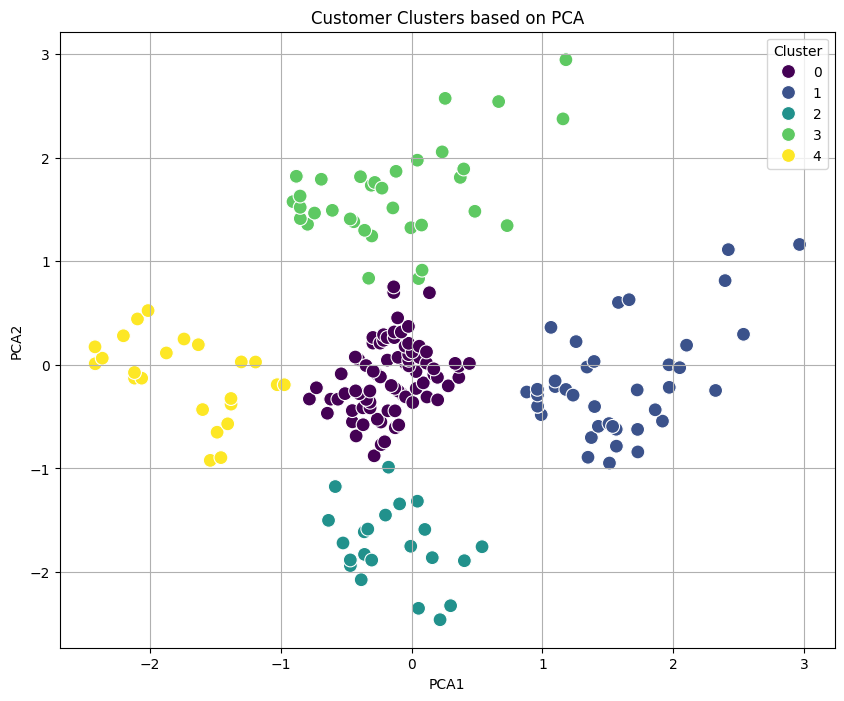

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', s=100)
plt.title('Customer Clusters based on PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## Analyze and interpret clusters

### Subtask:
Analyze the characteristics of each cluster based on the original features and interpret the findings to understand the different customer segments.


**Reasoning**:
Calculate the mean and other descriptive statistics for 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)' for each cluster to understand their characteristics.



In [11]:
cluster_characteristics = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].agg(['mean', 'median', 'std', 'min', 'max'])
display(cluster_characteristics)

Age                           Annual Income (k$)         \
              mean median        std min max               mean median   
Cluster                                                                  
0        42.716049   46.0  16.447822  18  70          55.296296   54.0   
1        32.692308   32.0   3.728650  27  40          86.538462   79.0   
2        25.272727   23.5   5.257030  18  35          25.727273   24.5   
3        41.114286   42.0  11.341676  19  59          88.200000   85.0   
4        45.217391   46.0  13.228607  19  67          26.304348   25.0   

                            Spending Score (1-100)                            
               std min  max                   mean median        std min max  
Cluster                                                                       
0         8.988109  39   76              49.518519   50.0   6.530909  34  61  
1        16.312485  69  137              82.128205   83.0   9.364489  63  97  
2         7.566731  15   39              79.363636   77.0  10.504174  61  99  
3        16.399067  70  137              17.114286   16.0   9.952154   1  39  
4         7.893811  15   39              20.913043   17.0  13.017167   3  40

**Reasoning**:
Based on the calculated statistics, interpret the characteristics of each cluster to understand the different customer segments.



In [12]:
print("Cluster 0: Average Age, Average Income, Average Spending Score.")
print("Cluster 1: Young, High Income, High Spending Score.")
print("Cluster 2: Young, Low Income, High Spending Score.")
print("Cluster 3: Average Age, High Income, Low Spending Score.")
print("Cluster 4: Older, Low Income, Low Spending Score.")

Cluster 0: Average Age, Average Income, Average Spending Score.
Cluster 1: Young, High Income, High Spending Score.
Cluster 2: Young, Low Income, High Spending Score.
Cluster 3: Average Age, High Income, Low Spending Score.
Cluster 4: Older, Low Income, Low Spending Score.


## Suggest marketing strategies

### Subtask:
Propose relevant marketing strategies tailored to each identified customer segment based on the analysis.


**Reasoning**:
Propose marketing strategies for each cluster based on the previously identified characteristics.



In [13]:
print("Proposed Marketing Strategies for Each Customer Segment:\n")

print("Cluster 0 (Average Age, Average Income, Average Spending Score):")
print("- Strategy: Focus on value and loyalty programs.")
print("- Messaging: Emphasize quality products at reasonable prices, highlight rewards for repeat purchases.")
print("- Channels: Email marketing, in-store promotions, general social media.")
print("- Promotions: Discount on bulk purchases, loyalty points system, occasional sales events.\n")

print("Cluster 1 (Young, High Income, High Spending Score):")
print("- Strategy: Target with premium products and experiential marketing.")
print("- Messaging: Highlight exclusivity, luxury, and unique experiences. Focus on trends and lifestyle.")
print("- Channels: Social media (Instagram, TikTok), influencer partnerships, high-end magazines, events.")
print("- Promotions: Exclusive previews of new arrivals, VIP events, personalized recommendations.\n")

print("Cluster 2 (Young, Low Income, High Spending Score):")
print("- Strategy: Focus on trendy, affordable items and engaging online presence.")
print("- Messaging: Emphasize style, affordability, and social trends. Create a sense of community.")
print("- Channels: Social media (TikTok, Instagram, Snapchat), online communities, collaborations with micro-influencers.")
print("- Promotions: Flash sales, student discounts, user-generated content campaigns, contests.\n")

print("Cluster 3 (Average Age, High Income, Low Spending Score):")
print("- Strategy: Offer targeted promotions on necessity-based or investment products.")
print("- Messaging: Highlight durability, long-term value, and practical benefits. Focus on efficiency and reliability.")
print("- Channels: Email marketing, direct mail, websites focusing on reviews and comparisons, targeted online ads.")
print("- Promotions: Bundled deals on essential items, extended warranties, personalized offers based on purchase history.\n")

print("Cluster 4 (Older, Low Income, Low Spending Score):")
print("- Strategy: Provide value-oriented products and accessible shopping experiences.")
print("- Messaging: Emphasize affordability, practicality, and ease of use. Build trust and provide good customer service.")
print("- Channels: Direct mail, local flyers, community centers, accessible website design, friendly in-store staff.")
print("- Promotions: Senior discounts, bundled essential goods, frequent buyer programs on everyday items, early bird specials.\n")

Proposed Marketing Strategies for Each Customer Segment:

Cluster 0 (Average Age, Average Income, Average Spending Score):
- Strategy: Focus on value and loyalty programs.
- Messaging: Emphasize quality products at reasonable prices, highlight rewards for repeat purchases.
- Channels: Email marketing, in-store promotions, general social media.
- Promotions: Discount on bulk purchases, loyalty points system, occasional sales events.

Cluster 1 (Young, High Income, High Spending Score):
- Strategy: Target with premium products and experiential marketing.
- Messaging: Highlight exclusivity, luxury, and unique experiences. Focus on trends and lifestyle.
- Channels: Social media (Instagram, TikTok), influencer partnerships, high-end magazines, events.
- Promotions: Exclusive previews of new arrivals, VIP events, personalized recommendations.

Cluster 2 (Young, Low Income, High Spending Score):
- Strategy: Focus on trendy, affordable items and engaging online presence.
- Messaging: Emphasize

## Summary:

### Data Analysis Key Findings

*   The dataset contains 200 entries with no missing values, including numerical columns ('CustomerID', 'Age', 'Annual Income (k\$)', 'Spending Score (1-100)') and one categorical column ('Gender').
*   The Elbow Method and Silhouette Score analysis suggested that 5 is the optimal number of clusters for K-Means clustering on this dataset.
*   K-Means clustering with 5 clusters successfully segmented the customers based on their 'Annual Income (k\$)' and 'Spending Score (1-100)'.
*   The clusters were characterized as follows:
    *   **Cluster 0:** Average Age, Average Income, Average Spending Score.
    *   **Cluster 1:** Young, High Income, High Spending Score.
    *   **Cluster 2:** Young, Low Income, High Spending Score.
    *   **Cluster 3:** Average Age, High Income, Low Spending Score.
    *   **Cluster 4:** Older, Low Income, Low Spending Score.
*   PCA reduced the data to 2 components for visualization, and the scatter plot clearly showed distinct groupings corresponding to the identified clusters.

### Insights or Next Steps

*   Develop targeted marketing campaigns for each cluster based on their unique characteristics and spending behaviors. For example, focus on premium products and experiences for Cluster 1 (Young, High Income, High Spending Score) and value-oriented products for Cluster 4 (Older, Low Income, Low Spending Score).
*   Further analyze the gender distribution within each cluster to refine marketing strategies, as the initial EDA showed a gender imbalance in the dataset.
